In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math

In [17]:
left_side_road_coordinates = pd.read_csv('RL_map_training/road_left.csv')
right_side_road_coordinates = pd.read_csv('RL_map_training/road_right.csv')

In [18]:
right_side_list_coordinates = list(zip(right_side_road_coordinates.x_values, right_side_road_coordinates.y_values))
left_side_list_coordinates = list(zip(left_side_road_coordinates.x_values, left_side_road_coordinates.y_values))


In [19]:
def get_middle_point(coordinates: tuple, list_coordinates: list[tuple]):
    min_distance = 100000
    closest_point = None

    for temp_coordinates in list_coordinates:
        distance = ((coordinates[0] - temp_coordinates[0]) ** 2 + (coordinates[1] - temp_coordinates[1]) ** 2) ** 0.5
        if distance < min_distance:
            min_distance = distance
            closest_point = temp_coordinates

            # get midlle of coordinates and closest point
            x_middle = (coordinates[0] + closest_point[0]) / 2
            y_middle = (coordinates[1] + closest_point[1]) / 2
            middle_point = (x_middle, y_middle)


    return middle_point

In [20]:
middle_side_list_coordinates = []

for points in left_side_list_coordinates:
    middle_point = get_middle_point(points, right_side_list_coordinates)
    middle_side_list_coordinates.append(middle_point)

with open('RL_map_training/road_middle.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x_values', 'y_values'])
    writer.writerows(middle_side_list_coordinates)

In [21]:
#remove error line in the beginning of the track
df = pd.read_csv('RL_map_training/road_middle.csv')
print(len(df))
df_modified = df.iloc[16:260]
df_modified.y_values = 560.0

df_final = pd.concat([df.iloc[:16], df_modified, df.iloc[260:]])
print(len(df_final))
df_final.to_csv('RL_map_training/road_middle.csv', index=False)


4558
4558


C:\Users\boulanger\AppData\Local\Temp\ipykernel_15480\1666993261.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified.y_values = 560.0


In [2]:
#create a dictionary .json file
# road_section
## next_turn
## direction_turn
## list_middle_points

import json

df = pd.read_csv('RL_map_training/road_middle.csv')
list_coordinates = list(zip(df.x_values, df.y_values))

road_section_locations = [
    [484.0, 560.0],
    [528.1, 444.6],
    [478.3, 400.5],
    [430.7, 453.4],
    [386.7, 496.1],
    [335.5, 382.1],
    [548.3, 336.4],
    [591.6, 387.2]
]

next_section_location = road_section_locations[0]
min_distance = 1000

for point in list_coordinates[1:]:

    distance = math.sqrt((next_section_location[0] - point[0])**2 + (next_section_location[1] - point[1])**2)

    # If the distance is more than 1.5 times the minimum distance, we can stop searching
    # because we reach the closest point and we are now going away from it
    if distance > 1.5 * min_distance:
        break

    if distance < min_distance:
        min_distance = distance

    previous_point = point

road_section = {
    'next_turn_point': [484.0, 560.0],
    'direction_turn': [1]
    # 'list_middle_points': [],
}

with open("RL_map_training/dict.json", "w") as file: 
    json.dump(road_section, file)


In [30]:
def get_angle_from_two_points(point, previous_point):
    return math.atan2(point[0] - previous_point[0], point[1] - previous_point[1])

In [31]:
def grouper(list_points_angles, n):

    final_liste = []
    mean = 0

    for idx, point_angle in enumerate(list_points_angles):
        if idx % (n) == (n-1):
            mean += point_angle[1]/n
            final_liste.append((point_angle[0], mean))
            mean = 0
        else:
            mean += point_angle[1]/n


    return final_liste

In [62]:
# find turn
turns_list_x = []
turns_list_y = []

df = pd.read_csv('RL_map_training/road_middle.csv')
list_coordinates = list(zip(df.x_values, df.y_values))


list_mean_angles_points = []
list_points_angles = []
group = 40

previous_point = list_coordinates[0]
for point in list_coordinates[1:]:

    angle = get_angle_from_two_points(point, previous_point)
    list_points_angles.append((point, angle))
    previous_point = point

# print(list_points_angles)

list_mean_angles_points = grouper(list_points_angles, group)
# print(list_mean_angles_points)

previous_mean_angle = list_mean_angles_points[0][1]
for point, mean_angle in list_mean_angles_points[1:]:
    delta = abs(mean_angle - previous_mean_angle)
    if delta > 0.16 and delta < 0.2:

        print(abs(abs(mean_angle) - abs(previous_mean_angle)))
        turns_list_x.append(point[0])
        turns_list_y.append(point[1])
    previous_mean_angle = mean_angle

# print(turns_list_x)
# print(turns_list_y)




0.18618459390037123
0.18626101842854226
0.18634012631097185
0.1856092099564064
0.18485727273491825
0.18685565051520348
0.18366408844345505
0.18548680803387052
0.1863688769755827
0.186421723488718
0.1853597672630758
0.18513518673535012
0.18538160576971974
0.1884737706657622
0.1839181908992238
0.18573965146390758
0.18476615707947008
0.18611294371688947
0.18604447573985783
0.18620188593693465
0.18438555726734845
0.1836340884525396
0.1780563286275775
0.1923015066771835
0.1811976592471487
0.17370265848420186
0.1856405642965271
0.19283113226792503
0.16595472824048052
0.17911572221874694
0.1891493786679801
0.1958085501504505
0.16552290472309017
0.16404672034872636
0.17561967754985164
0.1907578604729533
0.17170293453894125
0.17910723307130538
0.18534126457667843
0.18530670215026535
0.18628096752119716
0.18330839511949204


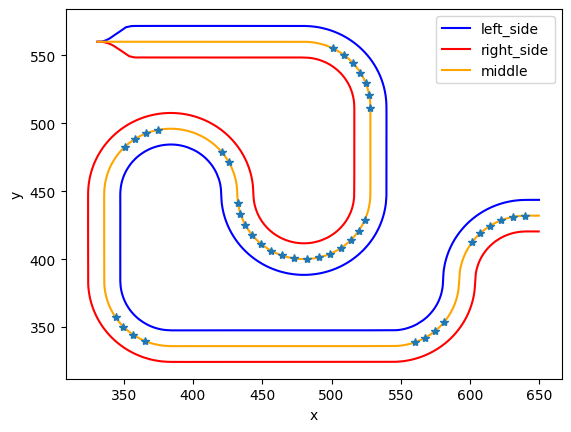

In [63]:
left_side_road_coordinates = pd.read_csv('RL_map_training/road_left.csv')
right_side_road_coordinates = pd.read_csv('RL_map_training/road_right.csv')
middle_side_road_coordinates = pd.read_csv('RL_map_training/road_middle.csv')

fig, ax = plt.subplots()

ax.plot(left_side_road_coordinates.x_values, left_side_road_coordinates.y_values, color='blue', label='left_side')
ax.plot(right_side_road_coordinates.x_values, right_side_road_coordinates.y_values, color='red', label='right_side')
ax.plot(middle_side_road_coordinates.x_values, middle_side_road_coordinates.y_values, color='orange', label='middle')

# print(len(turns_list))
# print(turns_list_x)
# print(turns_list_y)
ax.plot(turns_list_x, turns_list_y, marker='*', ls='none')

ax.set(xlabel='x', ylabel='y')
ax.legend()
plt.show()